In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [6]:
data ={
    "Area": [800,900,1000,1100,1200,1300,1400,1500,1600,1700],
    "Bedrooms":[1,2,2,2,3,3,3,4,4,4],
    "Bathrooms":[1,1,2,2,2,2,3,3,3,3],
    "Age":[15,12,10,8,6,5,4,3,2,1],
    "Distance_City":[15,14,13,12,11,10,9,8,7,6],
    "Price":[40,50,55,60,70,75,80,90,95,100]
}
df = pd.DataFrame(data)   

In [7]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =42)

In [63]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [82]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.5)

In [83]:
y_train_pred_lin = linear.predict(X_train_scaled)
y_test_pred_lin = linear.predict(X_test_scaled)

In [84]:
train_mse_lin = mean_squared_error(y_train, y_train_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)
print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)

Train MSE: 6.310887241768095e-30
Test MSE: 0.0


In [85]:
y_train_pred_rid = ridge.predict(X_train_scaled)
y_test_pred_rid = ridge.predict(X_test_scaled)

In [86]:
train_mse_rid = mean_squared_error(y_train, y_train_pred_rid)
test_mse_rid = mean_squared_error(y_test, y_test_pred_rid)
print("Train MSE:", train_mse_rid)
print("Test MSE:", test_mse_rid)

Train MSE: 0.6964402044136564
Test MSE: 0.7280102571595


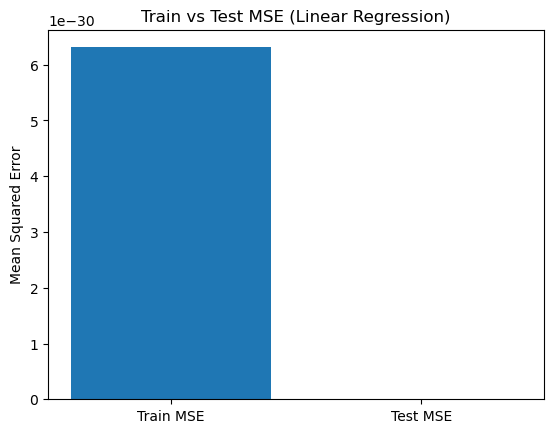

In [87]:
plt.bar(["Train MSE","Test MSE"],[train_mse_lin,test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Linear Regression)")
plt.show()

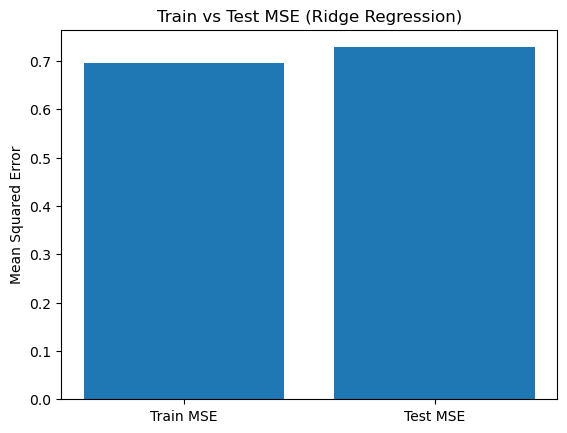

In [88]:
plt.bar(["Train MSE","Test MSE"],[train_mse_rid,test_mse_rid])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Ridge Regression)")
plt.show()

# LASSO REGRESSION

In [72]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.5)

In [73]:
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

In [74]:
Train_MSE_Lasso = mean_squared_error(y_train, y_train_pred)

Test_MSE_Lasso = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", Train_MSE_Lasso)

print("Test MSE:", Test_MSE_Lasso)

Train MSE: 0.2546571187190806
Test MSE: 0.35394679955411423


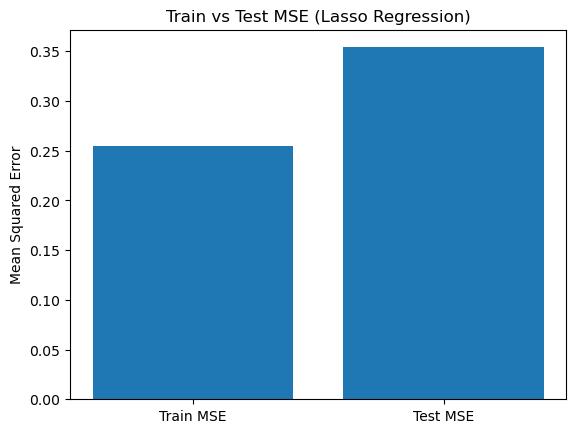

In [75]:
plt.bar(["Train MSE", "Test MSE"], [Train_MSE_Lasso, Test_MSE_Lasso])

plt.ylabel("Mean Squared Error")

plt.title("Train vs Test MSE (Lasso Regression)")

plt.show()

In [77]:
lasso_coefficients = pd.Series(lasso.coef_,index=X.columns)
print(lasso_coefficients)

Area             13.222327
Bedrooms          4.571933
Bathrooms         0.000000
Age              -0.000000
Distance_City    -0.000000
dtype: float64


In [79]:
X_plot = pd.DataFrame({
    "Area":np.linspace(df["Area"].min(),df["Area"].max(), 100),
    "Bedrooms":df["Bedrooms"].mean(),
    "Bathrooms":df["Bathrooms"].mean(),
    "Age":df["Age"].mean(),
    "Distance_City":df["Distance_City"].mean()
})

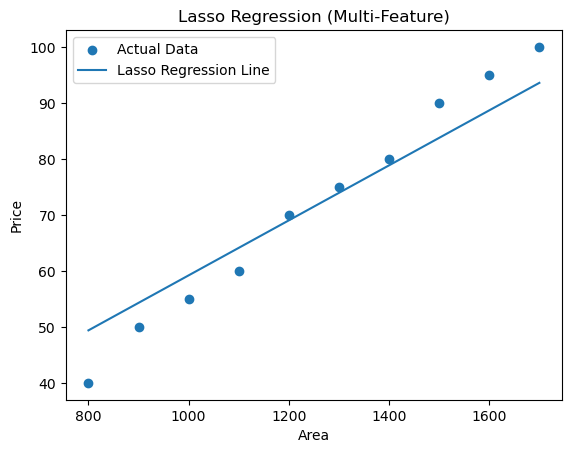

In [81]:
X_plot_scaled = scaler.transform(X_plot)
y_line = lasso.predict(X_plot_scaled)
plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line, label="Lasso Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-Feature)")
plt.legend()
plt.show()